# Librerías

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import plotly.express as px
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import json

# Datos

In [2]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [3]:
df

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
0,50010001201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15543,997730000607,2.0,Pública,3,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [5]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   codigo_sede                                        3312 non-null   int64 
 1   num nivel atencion                                 3312 non-null   int64 
 2   naturaleza                                         3312 non-null   object
 3   Ambulancias-Básica                                 3312 non-null   int64 
 4   Ambulancias-Medicalizada                           3312 non-null   int64 
 5   Camas-Adultos                                      3312 non-null   int64 
 6   Camas-Atención del Parto                           3312 non-null   int64 
 7   Camas-Cuidado Agudo Mental                         3312 non-null   int64 
 8   Camas-Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Camas-Cuidado Intensiv

In [6]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
79,50010214401,3,Pública,0,0,176,0,0,48,10,...,3,8,0,0,0,0,0,0,4,0
87,50010217802,2,Pública,0,2,47,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
88,50010217804,2,Pública,0,0,43,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
89,50010217807,2,Pública,0,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
90,50010217808,2,Pública,24,0,34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,3,0,15,0,0,0,0,...,1,0,2,0,0,0,0,0,0,1
15540,995240000608,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15542,996240000609,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Desbalanceo

In [7]:
df_publicas.groupby(['num nivel atencion']).agg(count=('codigo_sede', 'count'))

,count
num nivel atencion,
1,2738
2,416
3,158


# Modelo

## X and Y

In [8]:
y = df_publicas['num nivel atencion'].copy()
X = df_publicas[list(df_publicas.columns)[3:]].copy()

## Train - Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2, shuffle=True)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2318, 63), (994, 63), (2318,), (994,))

## Scale

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [57]:
clf_rf = BaggingClassifier(random_state=1)
clf_rf.fit(X_train_scaled, y_train)

BaggingClassifier(random_state=1)

## Testing

In [58]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

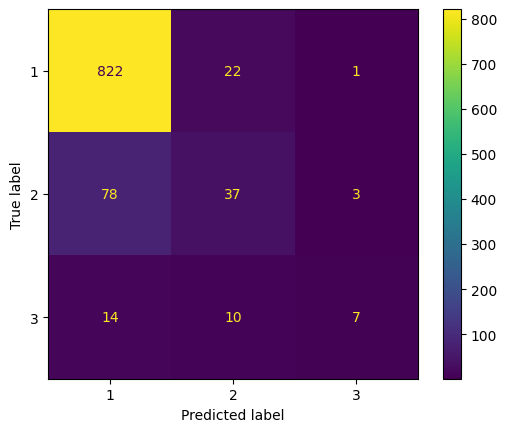

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.97      0.93       845
           2       0.54      0.31      0.40       118
           3       0.64      0.23      0.33        31

    accuracy                           0.87       994
   macro avg       0.69      0.50      0.55       994
weighted avg       0.85      0.87      0.85       994



In [61]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7541361345752144

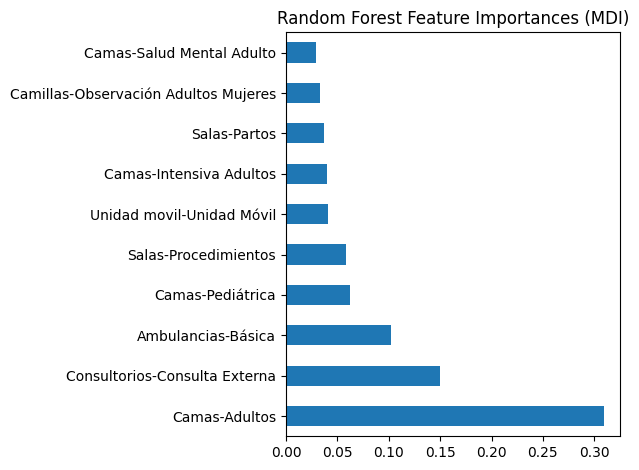

In [38]:
import pandas as pd

feature_names = list(df_publicas.columns)[3:]

mdi_importances = pd.Series(
    clf_rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
ax = mdi_importances.head(10).plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## GridSearchCV

In [39]:
[estimator.tree_.max_depth for estimator in clf_rf.estimators_]

[20, 20, 16, 18, 19, 19, 20, 17, 19, 17]

In [44]:
param_grid = [
    {
        'n_estimators': [50, 100, 200, 500],
        # 'max_depth': [5, 10, 15, 20, 25, 30],
    }
]

In [45]:
optimal_params = GridSearchCV(
    BaggingClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=3
)

In [46]:
optimal_params.fit(X_train_scaled, y_train)
# print(optimal_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[CV 1/5] END ...................n_estimators=50;, score=0.805 total time=   1.0s
[CV 2/5] END ...................n_estimators=50;, score=0.820 total time=   0.4s
[CV 3/5] END ...................n_estimators=50;, score=0.782 total time=   0.4s
[CV 4/5] END ...................n_estimators=50;, score=0.839 total time=   0.4s
[CV 5/5] END ...................n_estimators=50;, score=0.825 total time=   0.5s
[CV 1/5] END ..................n_estimators=100;, score=0.806 total time=   0.9s
[CV 2/5] END ..................n_estimators=100;, score=0.819 total time=   1.1s
[CV 3/5] END ..................n_estimators=100;, score=0.781 total time=   0.9s
[CV 4/5] END ..................n_estimators=100;, score=0.842 total time=   0.8s
[CV 5/5] END ..................n_estimators=100;, score=0.825 total time=   1.0s
[CV 1/5] END ..................n_estimators=200;, score=0.801 total time=   2.1s
[CV 2/5] END ..................n_estimators=200;, score=0.811 total time=   2.0s
[CV 3/5] END ...............

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid=[{'n_estimators': [50, 100, 200, 500]}],
             scoring='f1_weighted', verbose=3)

In [47]:
optimal_params.best_params_, optimal_params.best_score_

({'n_estimators': 200}, 0.8149557014733244)

## Training

In [62]:
clf_rf = BaggingClassifier(random_state=1,
                           n_estimators=200)
clf_rf.fit(X_train_scaled, y_train)

BaggingClassifier(n_estimators=200, random_state=1)

## Testing

In [63]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

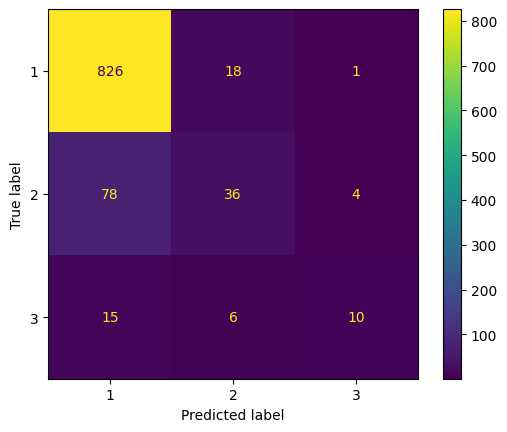

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.98      0.94       845
           2       0.60      0.31      0.40       118
           3       0.67      0.32      0.43        31

    accuracy                           0.88       994
   macro avg       0.72      0.54      0.59       994
weighted avg       0.86      0.88      0.86       994



In [66]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7791869539945412

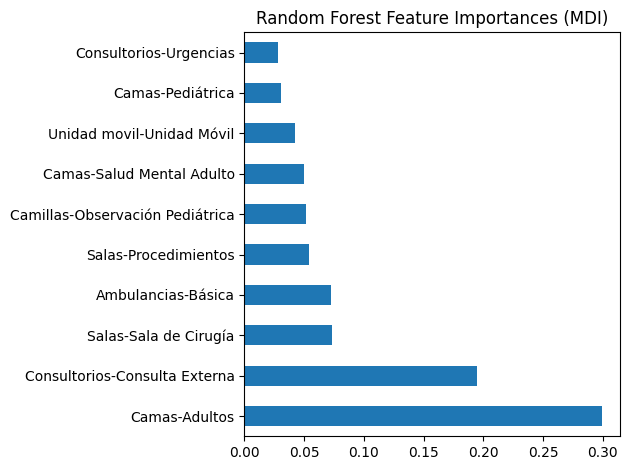

In [67]:
import pandas as pd

feature_names = list(df_publicas.columns)[3:]

mdi_importances = pd.Series(
    clf_rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
ax = mdi_importances.head(10).plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## Oversampling

In [18]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [19]:
ros = RandomOverSampler(random_state=1)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

In [20]:
X_train_resample.shape, X_test.shape, y_train_resample.shape, y_test.shape

((5715, 63), (994, 63), (5715,), (994,))

In [21]:
counter = Counter(y)
counter1 = Counter(y_train)
counter2 = Counter(y_train_resample)

In [22]:
counter, counter1, counter2

(Counter({1: 2738, 2: 416, 3: 158}),
 Counter({1: 1905, 2: 294, 3: 119}),
 Counter({1: 1905, 2: 1905, 3: 1905}))

## Scale

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_scaled = scaler.transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

## Training

In [24]:
clf_rf = BaggingClassifier(random_state=1)
clf_rf.fit(X_train_scaled, y_train_resample)

BaggingClassifier(random_state=1)

## Testing

In [25]:
predictions = clf_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

### SMOTE

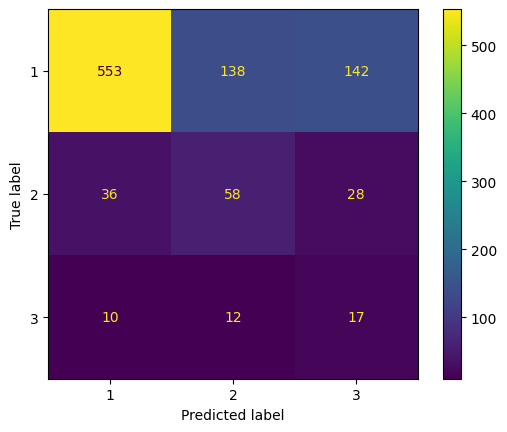

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [96]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.66      0.77       833
           2       0.28      0.48      0.35       122
           3       0.09      0.44      0.15        39

    accuracy                           0.63       994
   macro avg       0.43      0.53      0.42       994
weighted avg       0.81      0.63      0.70       994



In [97]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7315978934659194

### Random Over Sampling

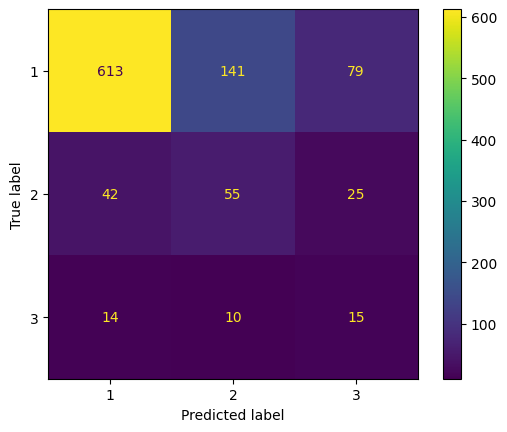

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.92      0.74      0.82       833
           2       0.27      0.45      0.34       122
           3       0.13      0.38      0.19        39

    accuracy                           0.69       994
   macro avg       0.44      0.52      0.45       994
weighted avg       0.81      0.69      0.73       994



In [28]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled), multi_class='ovo')

0.7260041889811831

# Predecir en Privadas y Mixtas

In [36]:
df_otras = df[df['num nivel atencion'].isna()].copy()

In [37]:
df_otras

,codigo_sede,num nivel atencion,naturaleza,Adultos,Atención del Parto,Básica,Consulta Externa,Cuidado Agudo Mental,Cuidado Intensivo Adulto,Cuidado Intensivo Neonatal,...,Salud Mental Adulto,Salud Mental Pediátrico,Sillas de Hemodiálisis,Sillas de Quimioterapia,TPR,Transplante de progenitores hematopoyeticos,Unidad Móvil,Unidad de Quemados Adulto,Unidad de Quemados Pediátrico,Urgencias
0,50010001201,NaN,Privada,0,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,990010012702,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15541,995240009101,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## X and Y

In [38]:
X_new = df_otras[list(df_publicas.columns)[3:]].copy()

In [39]:
X_new

,Adultos,Atención del Parto,Básica,Consulta Externa,Cuidado Agudo Mental,Cuidado Intensivo Adulto,Cuidado Intensivo Neonatal,Cuidado Intensivo Pediátrico,Cuidado Intermedio Adulto,Cuidado Intermedio Neonatal,...,Salud Mental Adulto,Salud Mental Pediátrico,Sillas de Hemodiálisis,Sillas de Quimioterapia,TPR,Transplante de progenitores hematopoyeticos,Unidad Móvil,Unidad de Quemados Adulto,Unidad de Quemados Pediátrico,Urgencias
0,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,39,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15541,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15544,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_new_scaled = scaler.transform(X_new)

In [41]:
pd.DataFrame(X_new_scaled)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,-0.235695,-0.079989,-0.584721,3.511404,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
1,-0.235695,-0.079989,-0.584721,-0.167520,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
2,-0.235695,-0.079989,-0.584721,-0.351466,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
3,-0.235695,-0.079989,-0.584721,1.487996,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
4,-0.235695,-0.079989,-0.584721,6.270597,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,2.624796,0.0,0.0,-0.492246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,-0.235695,-0.079989,-0.584721,-0.719358,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
12230,-0.235695,-0.079989,-0.584721,-0.719358,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
12231,-0.235695,-0.079989,-0.584721,-0.719358,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246
12232,-0.235695,-0.079989,-0.584721,-0.167520,0.0,-0.051533,-0.03826,-0.035037,-0.060569,-0.031414,...,-0.068514,-0.037258,-0.042065,-0.048261,-0.21531,0.0,-0.351856,0.0,0.0,-0.492246


In [42]:
predictions = clf_rf.predict(X_new_scaled)

In [43]:
Counter(predictions)

Counter({1: 10712, 2: 1115, 3: 407})

In [44]:
df_otras['Nivel Atencion Predicho'] = predictions

In [45]:
df_otras

,codigo_sede,num nivel atencion,naturaleza,Adultos,Atención del Parto,Básica,Consulta Externa,Cuidado Agudo Mental,Cuidado Intensivo Adulto,Cuidado Intensivo Neonatal,...,Salud Mental Pediátrico,Sillas de Hemodiálisis,Sillas de Quimioterapia,TPR,Transplante de progenitores hematopoyeticos,Unidad Móvil,Unidad de Quemados Adulto,Unidad de Quemados Pediátrico,Urgencias,Nivel Atenacion Predicho
0,50010001201,NaN,Privada,0,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,50010016401,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,50010025201,NaN,Privada,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,50010025204,NaN,Privada,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,50010029701,NaN,Privada,0,0,0,39,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,990010012702,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15541,995240009101,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15544,997730011401,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15545,997730013001,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
